# Module 1

In [1]:
import matplotlib.pyplot as plt
import imageio as img
import numpy as np
import skimage.filters as filters #for different thresholding algorithms
import seaborn as sns; sns.set_style('white'); sns.set_context('notebook')

In [2]:
figfile = 'Processed/'

First, let's import the image using the function `imread`. This creates an array `pic` of dtype `uint8`, i.e. integers ranging from 0 - 255. 

In [3]:
pic = np.array(img.imread('Images/kiran1.tif'))

Next, plot the array using the function `imshow`. `cmap` sets the color map.

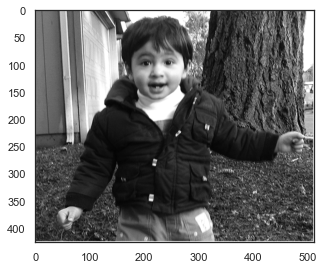

In [4]:
plt.figure(figsize = (5,5))
plt.imshow(pic, cmap = 'gray');
plt.savefig(figfile+'kiran1.tif',dpi = 300)

We can zoom into the image by slicing the array appropriately.

[[214 215 213 214 212 213 221 204 223]
 [212 210 212 214 217 218 218 208 225]
 [220 212 212 210 212 219 218 218 230]
 [223 217 214 210 207 211 215 225 228]
 [224 221 216 218 214 208 212 220 227]
 [227 221 218 218 218 219 217 216 224]
 [226 220 216 218 218 219 220 222 221]
 [222 221 218 220 221 221 223 229 229]
 [216 212 214 219 220 222 219 229 232]]


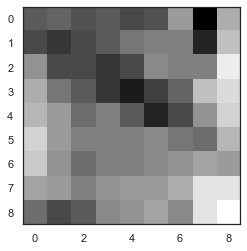

In [5]:
print(pic[101:110,101:110])
plt.imshow(pic[101:110,101:110], cmap = 'gray');

If we multiply the array, all values _x_ above 255 get reassigned to _x mod_ 256. To avoid this, we can cast the array to dtype `double`.

In [6]:
print(3*pic)
print(3*pic.astype('double'))

[[253 253 253 ... 253 253 253]
 [253 154  46 ... 253 253 253]
 [253  43  89 ... 253 253 253]
 ...
 [253 155  60 ...  11 154 250]
 [253  91 176 ... 251 139 253]
 [253 253 253 ... 253 253 253]]
[[765. 765. 765. ... 765. 765. 765.]
 [765. 666. 558. ... 765. 765. 765.]
 [765. 555. 345. ... 765. 765. 765.]
 ...
 [765. 411.  60. ... 267. 666. 762.]
 [765. 603. 432. ... 507. 651. 765.]
 [765. 765. 765. ... 765. 765. 765.]]


What happens if we plot an array with dtype `double`?

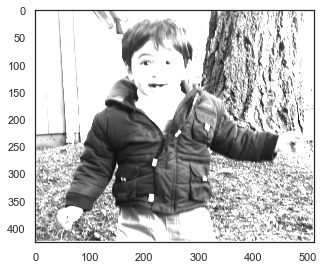

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(3*pic.astype('double'), cmap = 'gray', vmin = 0, vmax = 255);

`imshow` clips the data so that anything higher than 255 gets assigned to 255. `vmin`, `vmax` values are necessary for this. <br>
If `vmin`, `vmax` are not specified, `imshow` will scale the `cmap` so that `3*pic` will be same as `pic`.

What happens if the elements of the array are not integer values?

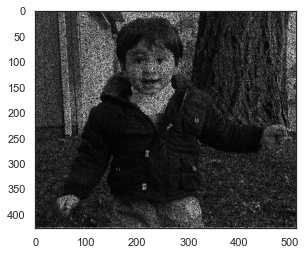

In [8]:
pic2 = pic.astype('double')
pic2 = pic2*np.random.rand(np.shape(pic2)[0], np.shape(pic2)[1]) #adding some noise
plt.imshow(pic2, cmap = 'gray', vmin = 0, vmax = 255);

`imshow` still plots the values. Is it recasting `double` to `int`?

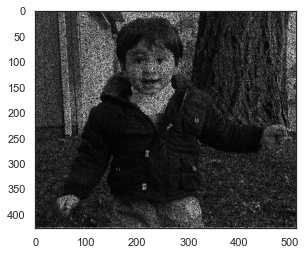

In [9]:
#is imshow casting doubles to integers?
pic3 = pic2.astype('int')
plt.imshow(pic2, cmap = 'gray', vmin = 0, vmax = 255);

Yes.

### Excercises
**4\. Blurring**

In [10]:
def blur(pic):
    blur = pic.copy()
    for i in np.arange(1,np.shape(pic)[1]-1):
           blur[1:-1,i] = np.mean([pic[1:-1,i-1],
                                   pic[1:-1,i+1],pic[0:-2,i],pic[2:,i]],axis = 0)
            #iterate over columns and average
    return blur

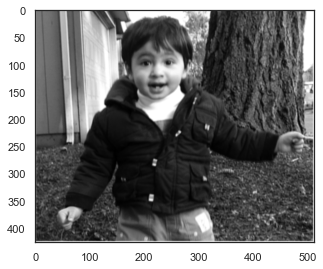

In [11]:
plt.figure(figsize = (5,5))
blurred_pic = blur(pic)
plt.imshow(blurred_pic, cmap = 'gray');
plt.savefig(figfile+'blurred_kiran1.tif', dpi = 300) #save and compare with kiran1.tif

**5\. Counting**

In [12]:
def count(pic, threshold):
    n = np.sum((pic>threshold).astype('int'))
    return n

In [13]:
print(count(pic, 100))

69044


**6\. _CoM_**

In [14]:
def COM(pic):
    if np.shape(np.shape(pic))[0]<2: pic = np.array([pic])
    x_com = np.zeros(np.shape(pic)[0])
    y_com = np.zeros(np.shape(pic)[1])
    for i in np.arange(0, np.max(np.shape(pic))):
        if (i<np.shape(pic)[1]): x_com += ((i)*pic[:,i]) #Xcom along columns
        if (i<np.shape(pic)[0]): y_com += ((i)*pic[i,:]) #Ycom along rows
    x_com = np.sum(x_com)/np.sum(pic) #normalize
    y_com = np.sum(y_com)/np.sum(pic) #normalize
    return x_com, y_com

CoM for a vector = [12, 5, 6]

In [15]:
vec = np.array([12,5,6])

x_com, y_com = COM(vec)
print('Xcom =', x_com, 'Ycom =', y_com)

Xcom = 0.7391304347826086 Ycom = 0.0


CoM for an image

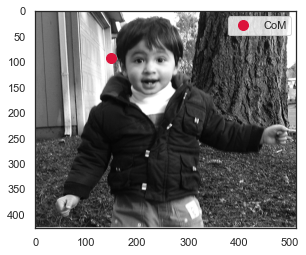

In [16]:
x_com, y_com = COM(pic)
plt.imshow(pic, cmap = 'gray')
plt.plot(x_com,y_com,'o',color = 'crimson',markersize = 10);
plt.legend(['CoM']);

## 1.1A Puzzle

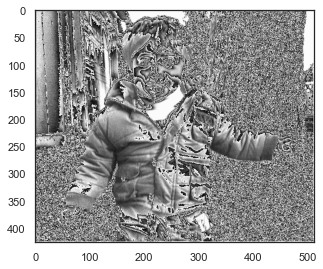

In [17]:
plt.figure(figsize = (5,5))
pic_1 = 6*pic
pic_2 = 1/6*pic_1
plt.imshow(pic_2, cmap = 'gray');
plt.show()

When multiplying `pic` with an integer we saw that values get recast as _mod 256_. On dividing by the same integer, it does not get mapped back to the same value.

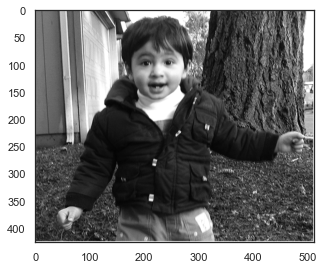

In [18]:
plt.figure(figsize = (5,5))
pic_1 = 6.2*pic
pic_2 = pic_1/6.2
plt.imshow(pic_2, cmap = 'gray');
plt.show()

Multiplying and dividing by a `double` works because when we multiply `pic` with a `double`, the dtype of the new array is `double`.

## 1.2 Global Thresholding

### 1\. User Defined Threshold

Define a function to binarize the image for a given threshold.

In [19]:
def thresher(pic, threshold):
    thresh = np.where(pic < threshold, 0, 1) #binarizes the image
    return thresh

Examples of thresholded images

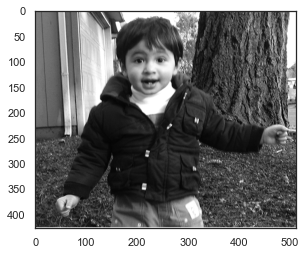

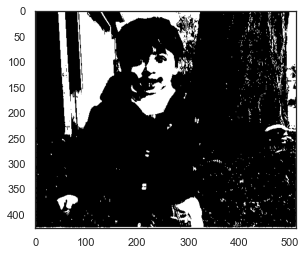

In [20]:
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = thresher(pic,150)
plt.imshow(thresh_pic, cmap = 'gray');

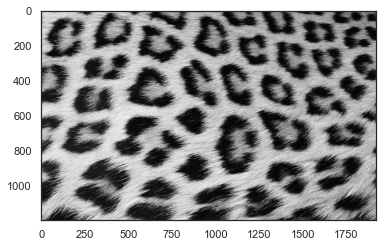

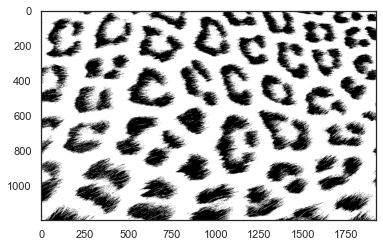

In [21]:
pic = np.array(img.imread('Images/leopard_fur_gray.jpg'))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = thresher(pic,50)
plt.imshow(thresh_pic, cmap = 'gray');

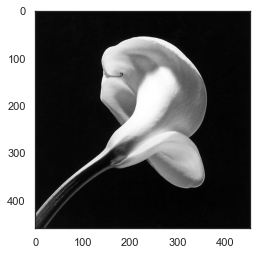

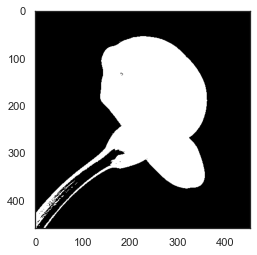

In [22]:
pic = np.array(img.imread('Images/robert-mapplethrope-calla-lily-1984.png'))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = thresher(pic,50)
plt.imshow(thresh_pic, cmap = 'gray');

In [23]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.2125 , 0.7154, 0.0721]) #colour conversion function

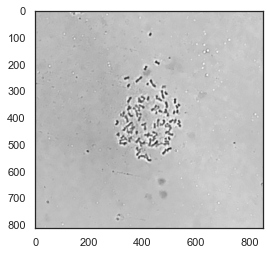

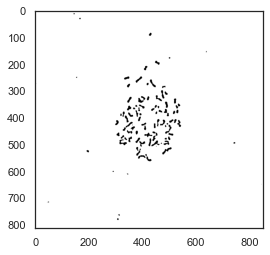

In [24]:
pic = gray(np.array(img.imread('Images/chromosomes.png')))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = thresher(pic,150)
plt.imshow(thresh_pic, cmap = 'gray');

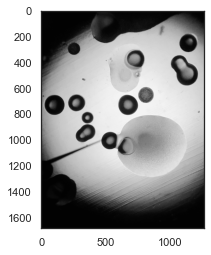

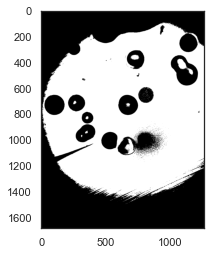

In [25]:
pic = gray(np.array(img.imread('Images/colonies.png')))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = thresher(pic,140)
plt.imshow(thresh_pic, cmap = 'gray');

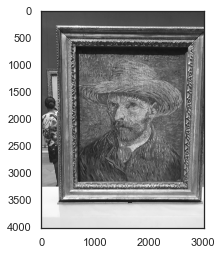

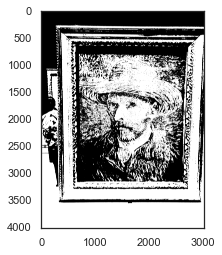

In [26]:
pic = gray(np.array(img.imread('Images/vangogh.png')))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = thresher(pic,95)
plt.imshow(thresh_pic, cmap = 'gray');

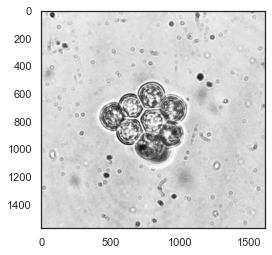

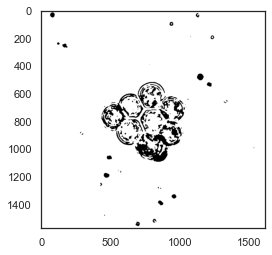

In [27]:
pic = gray(np.array(img.imread('Images/algae.png')))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = thresher(pic,150)
plt.imshow(thresh_pic, cmap = 'gray');

### 2\. Edge Detection after Global Thresholding

Once thresholded, it should be possible to find 'edges' in the image. The sum of the difference between neighbouring pixel values and its own value can be calculated for each pixel. Let's call this a 'difference sum'. A cutoff on this sum can be used to identify the points where intensity changes suddenly.

In [28]:
def edge(pic, thresh, cutoff):
    pic = np.where(pic > thresh, 0, 255) #clean up - global thresholding; defines continuous black and white regions
    grad = np.ones(np.shape(pic))
    for i in np.arange(1,np.shape(pic)[1]-1):
        row = pic[1:-1,i]
        grad[1:-1,i] = np.sum([np.abs(pic[1:-1,i-1]-row),np.abs(pic[1:-1,i+1]-row), 
                               np.abs(pic[0:-2,i]-row),np.abs(pic[2:,i]-row)],axis = 0)
        #by calculating the 'difference sum' for each pixel, we can find boundaries of continuous regions
    grad = grad/np.max(grad)
    threshed = thresher(grad, cutoff) #all pixels with large difference sums go to 0, rest go to 1
    return threshed

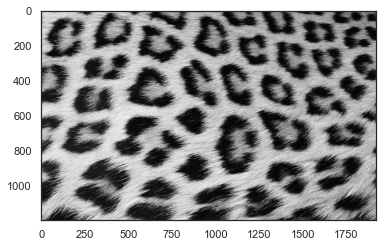

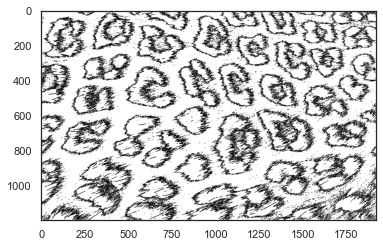

In [29]:
pic = np.array(img.imread('Images/leopard_fur_gray.jpg'))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = edge(pic, 100, 0.1)
plt.imshow(thresh_pic, cmap = 'gray_r');

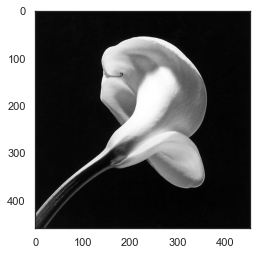

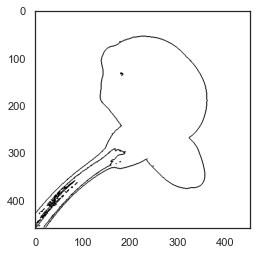

In [30]:
pic = np.array(img.imread('Images/robert-mapplethrope-calla-lily-1984.png'))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = edge(pic,50,0.2)
plt.imshow(thresh_pic, cmap = 'gray_r');

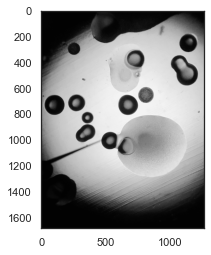

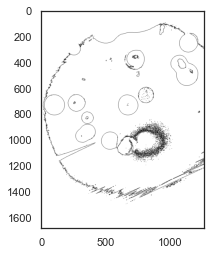

In [31]:
pic = gray(np.array(img.imread('Images/colonies.png')))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = edge(pic,150,0.1)
plt.imshow(thresh_pic, cmap = 'gray_r');

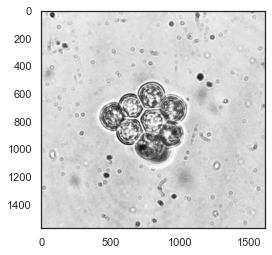

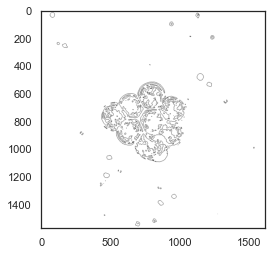

In [32]:
pic = gray(np.array(img.imread('Images/algae.png')))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = edge(pic,150,0.1)
plt.imshow(thresh_pic, cmap = 'gray_r');

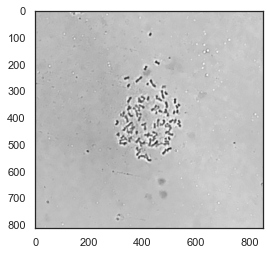

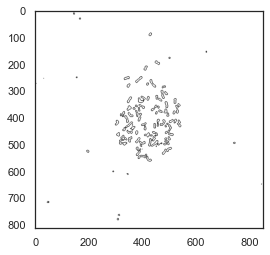

In [33]:
pic = gray(np.array(img.imread('Images/chromosomes.png')))
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = edge(pic,150,0.1)
plt.imshow(thresh_pic, cmap = 'gray_r');

### 3. Other Global Thresholds

Different algorithms can be used to define thresholds for an image.

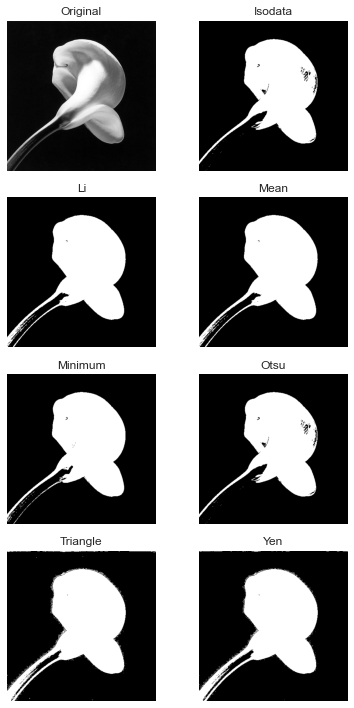

In [34]:
pic = np.array(img.imread('Images/robert-mapplethrope-calla-lily-1984.png'))
fig, ax = filters.try_all_threshold(pic, figsize = (6,10), verbose = False)
plt.show()

## 1.2 Local Thresholding

Instead of defining a single threshold for the entire image, local thresholding defines a threshold for each pixel in the image.

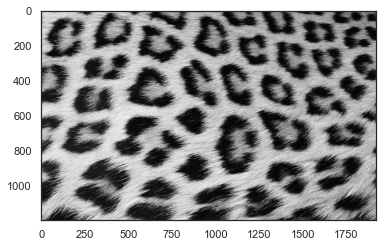

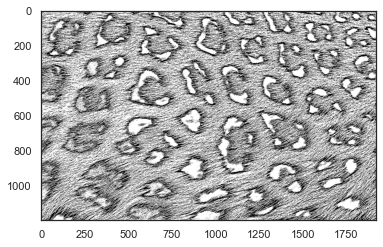

In [35]:
pic = np.array(img.imread('Images/leopard_fur_gray.jpg'))
block_size = 35
adaptive_thresh = filters.threshold_local(pic, block_size, offset=10)
thresh_pic = thresher(pic, adaptive_thresh)
plt.imshow(pic, cmap = 'gray'); plt.show()
plt.imshow(thresh_pic, cmap = 'gray');

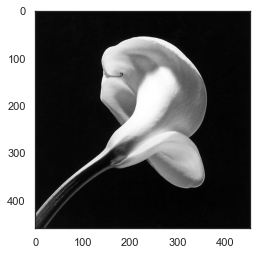

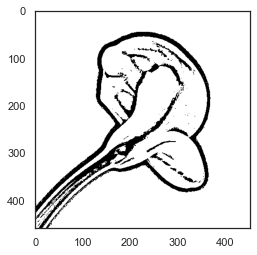

In [36]:
'Images/robert-mapplethrope-calla-lily-1984.png'
pic = np.array(img.imread('Images/robert-mapplethrope-calla-lily-1984.png'))
block_size = 35
adaptive_thresh = filters.threshold_local(pic, block_size, offset=10)
thresh_pic = thresher(pic, adaptive_thresh)
plt.imshow(pic, cmap = 'gray'); plt.show()
plt.imshow(thresh_pic, cmap = 'gray');

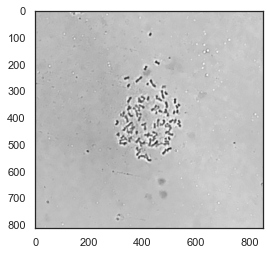

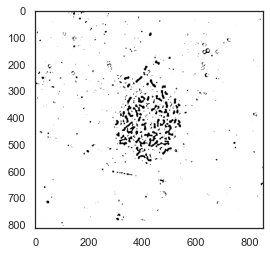

In [37]:
pic = gray(np.array(img.imread('Images/chromosomes.png')))
block_size = 35
adaptive_thresh = filters.threshold_local(pic, block_size, offset=10)
thresh_pic = thresher(pic, adaptive_thresh)
plt.imshow(pic, cmap = 'gray'); plt.show()
plt.imshow(thresh_pic, cmap = 'gray');

## 1.3 More Thresholding

### Otsu's Method
__A type of global thresholding__

In [38]:
pic = np.array(img.imread('Images/robert-mapplethrope-calla-lily-1984.png'))

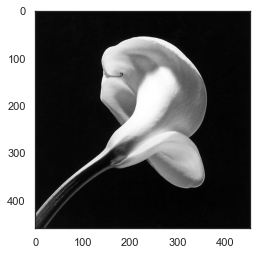

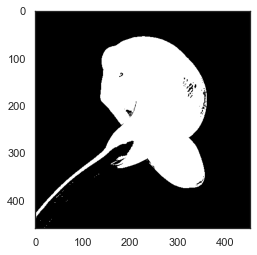

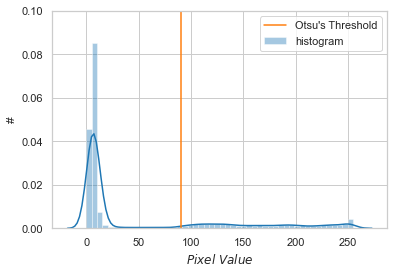

In [39]:
threshold = filters.threshold_otsu(pic)
plt.imshow(pic, cmap = 'gray'); plt.show()
thresh_pic = thresher(pic,threshold)
plt.imshow(thresh_pic, cmap = 'gray'); plt.show()

sns.set_style('whitegrid'); sns.distplot(pic.ravel())
y = np.arange(0,1,0.1); x = threshold*np.ones(np.shape(y))
plt.plot(x,y); plt.legend(["Otsu's Threshold","histogram"])
plt.ylim(0,0.1); plt.xlabel('$Pixel\ Value$'); plt.ylabel('#')
sns.set_style('white')

Distribution is unimodal. The stalk is left out of the thresholded image due to its darker shade.

In [40]:
pic2 = np.array(img.imread('Images/MakeUp_RichardPrince_1983_gray.png'))

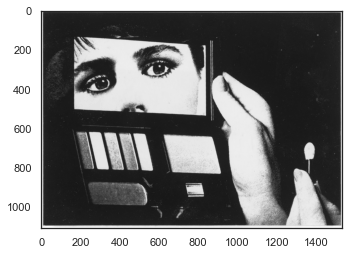

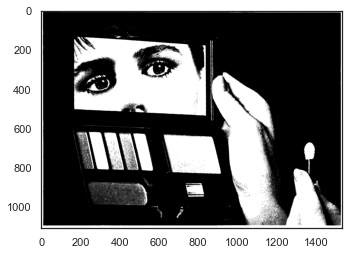

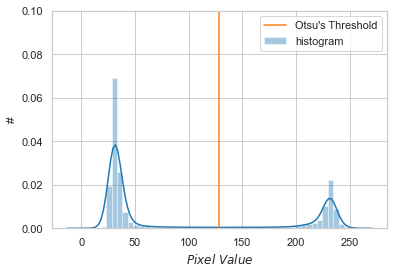

In [41]:
threshold2 = filters.threshold_otsu(pic2)
plt.imshow(pic2, cmap = 'gray'); plt.show()
thresh_pic2 = thresher(pic2,threshold2)
plt.imshow(thresh_pic2, cmap = 'gray'); plt.show()

sns.set_style('whitegrid'); sns.distplot(pic2.ravel())
y = np.arange(0,1,0.1); x = threshold2*np.ones(np.shape(y))
plt.plot(x,y); plt.legend(["Otsu's Threshold","histogram"])
plt.ylim(0,0.1); plt.xlabel('$Pixel\ Value$'); plt.ylabel('#')
plt.show()
sns.set_style('white')

The distribution is bimodal. Gives a nicely thresholded image.

In [42]:
pic3 = np.array(img.imread('Images/robert-mapplethrope-calla-lily-1984_CROP.png'))

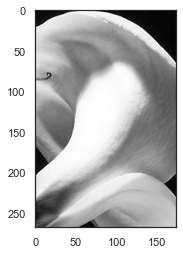

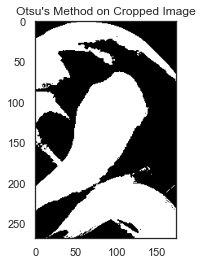

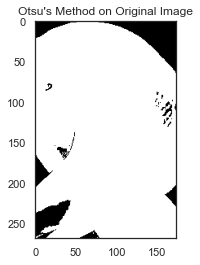

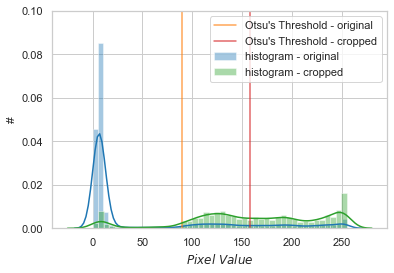

In [43]:
threshold3 = filters.threshold_otsu(pic3)
plt.imshow(pic3, cmap = 'gray'); plt.show()
thresh_pic3 = thresher(pic3,threshold3)
plt.title("Otsu's Method on Cropped Image")
plt.imshow(thresh_pic3, cmap = 'gray'); plt.show()
plt.title("Otsu's Method on Original Image")
plt.imshow(thresh_pic[54:54+np.shape(pic3)[0],164:164+np.shape(pic3)[1]], cmap = 'gray'); plt.show()

sns.set_style('whitegrid')
sns.distplot(pic.ravel()); y = np.arange(0,1,0.1); x = threshold*np.ones(np.shape(y))
plt.plot(x,y,alpha = 0.7)
sns.distplot(pic3.ravel()); x = threshold3*np.ones(np.shape(y))
plt.plot(x,y,alpha = 0.7)

plt.legend(["Otsu's Threshold - original","Otsu's Threshold - cropped","histogram - original","histogram - cropped"])

plt.ylim(0,0.1); plt.xlabel('$Pixel\ Value$'); plt.ylabel('#')
plt.show()

sns.set_style('white')

The histogram changes on cropping and therefore the calculated Otsu's threshold will be different.

## Otsu's method on chromosomes

In [44]:
pic4 = gray(np.array(img.imread('Images/chromosomes.png')))

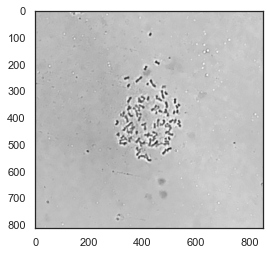

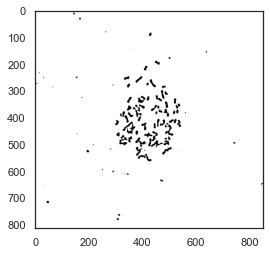

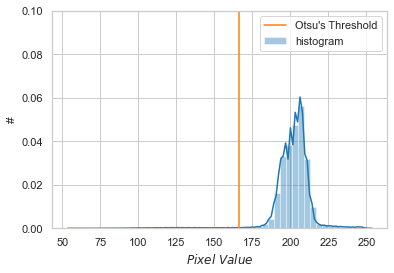

In [45]:
threshold4 = filters.threshold_otsu(pic4)
plt.imshow(pic4, cmap = 'gray'); plt.show()
thresh_pic4 = thresher(pic4,threshold4)
plt.imshow(thresh_pic4, cmap = 'gray'); plt.show()

sns.set_style('whitegrid'); sns.distplot(pic4.ravel())
y = np.arange(0,1,0.1); x = threshold4*np.ones(np.shape(y))
plt.plot(x,y); plt.legend(["Otsu's Threshold","histogram"])
plt.ylim(0,0.1); plt.xlabel('$Pixel\ Value$'); plt.ylabel('#')
sns.set_style('white')